<a href="https://colab.research.google.com/github/maddara88/Deep_Learning_Project_Work/blob/main/Module_6_RNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Tasks to be Done: 

# Using airline-passenger Dataset try to predict the number of passengers for next month,given the 
# number of passengers (in units of thousands) for this month 


# A. You can write a simple function to convert our single column of data into a two-column 
# dataset: 
# a. The first column containing this month’s (t) passenger count and the second 
# column containing next month’s (t+1) passenger count, to be predicted.
# b. Divide the data into train and test set 
# c. Fit an LSTM model on top of the data where the optimizer = ‘adam’ and epoch 
# =’100’
# d. Build another model where optimizer = ‘sgd’ and epoch = ‘50'

In [2]:
#Lets first import the nessesary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Importing the data
df = pd.read_csv("airline-passengers.csv",names= ["Month","Passengers"])

In [4]:
df.head()

,Month,Passengers
0,"""Month"",""Passengers""",NaN
1,"""1949-01"",112",NaN
2,"""1949-02"",118",NaN
3,"""1949-03"",132",NaN
4,"""1949-04"",129",NaN


In [5]:
#Now we need to convert our dataframe into a usable manner

In [6]:
#Removing he first row
df = df.iloc[1:]

In [7]:
df.head()

,Month,Passengers
1,"""1949-01"",112",NaN
2,"""1949-02"",118",NaN
3,"""1949-03"",132",NaN
4,"""1949-04"",129",NaN
5,"""1949-05"",121",NaN


In [8]:
df = df.reset_index(drop = True) #Reseting the index column

In [9]:
df.head()

,Month,Passengers
0,"""1949-01"",112",NaN
1,"""1949-02"",118",NaN
2,"""1949-03"",132",NaN
3,"""1949-04"",129",NaN
4,"""1949-05"",121",NaN


In [10]:
df1 = df["Month"].str.split(",",expand = True) #splitting the values in the month column

In [11]:
df1.head()

,0,1
0,"""1949-01""",112
1,"""1949-02""",118
2,"""1949-03""",132
3,"""1949-04""",129
4,"""1949-05""",121


In [12]:
df2 = pd.DataFrame() #Creating a new dataframe
df2["Month"] = df1.loc[:,0]
df2["Passengers"] = df1.loc[:,1]
df2.head()

,Month,Passengers
0,"""1949-01""",112
1,"""1949-02""",118
2,"""1949-03""",132
3,"""1949-04""",129
4,"""1949-05""",121


In [13]:
df2["Month"] = df2["Month"].str.replace('"','')

In [14]:
df2.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [15]:
df2["Month"] = pd.to_datetime(df2["Month"]) #converting the month dtype to datetime 

In [16]:
df2.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [17]:
df2 = df2.set_index("Month") # setting the index column into month column

In [18]:
df2.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [19]:
df2["Passengers"] = df2["Passengers"].astype(int) #we had passengers dtype as object so to plot it we need to change ots dtype to int

<Axes: xlabel='Month'>

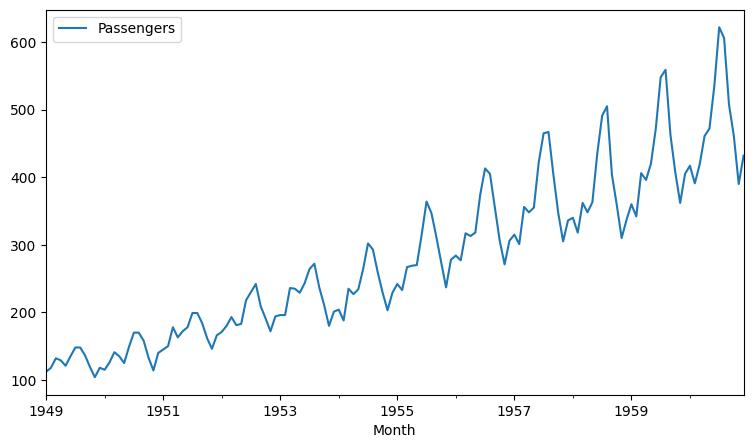

In [20]:
df2.plot(figsize = (9,5))

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

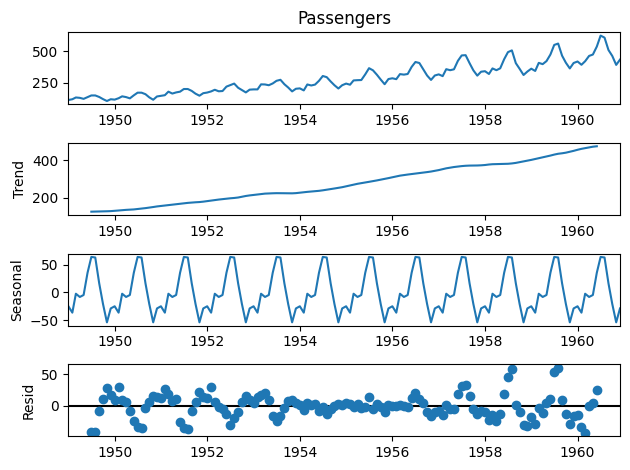

In [22]:
result = seasonal_decompose(df2["Passengers"])
result.plot();

In [23]:
len(df2)

144

In [24]:
train = df2.iloc[:120] # splitting our data to train and test set 
test = df2.iloc[120:]

In [25]:
print(train.shape)
print(test.shape)

(120, 1)
(24, 1)


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [27]:
df2.head(),df2.tail()

(            Passengers
 Month                 
 1949-01-01         112
 1949-02-01         118
 1949-03-01         132
 1949-04-01         129
 1949-05-01         121,
             Passengers
 Month                 
 1960-08-01         606
 1960-09-01         508
 1960-10-01         461
 1960-11-01         390
 1960-12-01         432)

In [28]:
scaler.fit(train) #Scaling our dataset inbetween 0 and 1 using minmax scaler 
scaled_train = scaler.transform(train) # Note that if you are having a very high level of outliers present we can go with standard scaler
scaled_test = scaler.transform(test)

In [29]:
scaled_train[:10]

array([[0.01995012],
       [0.03491272],
       [0.06982544],
       [0.06234414],
       [0.04239401],
       [0.07730673],
       [0.10972569],
       [0.10972569],
       [0.0798005 ],
       [0.03740648]])

In [30]:
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator

In [31]:
n_input = 3 #define Generator
n_feature = 1
generator = TimeseriesGenerator(scaled_train,scaled_train,length = n_input,batch_size = 1)

In [32]:
x,y = generator[0]
print(f'Given the Array: \n{x.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.01995012 0.03491272 0.06982544]
Predict this y: 
 [[0.06234414]]


In [33]:
x.shape

(1, 3, 1)

In [34]:
#Now instead of 3 months we are going to give the 12 months 
n_input = 12
generator = TimeseriesGenerator(scaled_train,scaled_train,length = n_input,batch_size = 1)

In [35]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [36]:
#del model
#Defining the model
model = Sequential()
model.add(LSTM(100,activation = "relu",input_shape = (n_input,n_feature)))
model.add(Dense(1))
model.compile(optimizer="adam",loss = "mse")

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [38]:
#fitting the mode
model.fit(generator,epochs = 100)

Epoch 1/100
108/108 [==============================] - 6s 14ms/step - loss: 0.0360
Epoch 2/100
108/108 [==============================] - 2s 15ms/step - loss: 0.0131
Epoch 3/100
108/108 [==============================] - 1s 12ms/step - loss: 0.0128
Epoch 4/100
108/108 [==============================] - 1s 12ms/step - loss: 0.0109
Epoch 5/100
108/108 [==============================] - 2s 17ms/step - loss: 0.0117
Epoch 6/100
108/108 [==============================] - 2s 18ms/step - loss: 0.0105
Epoch 7/100
108/108 [==============================] - 2s 15ms/step - loss: 0.0111
Epoch 8/100
108/108 [==============================] - 2s 14ms/step - loss: 0.0111
Epoch 9/100
108/108 [==============================] - 1s 13ms/step - loss: 0.0117
Epoch 10/100
108/108 [==============================] - 1s 11ms/step - loss: 0.0082
Epoch 11/100
108/108 [==============================] - 1s 11ms/step - loss: 0.0079
Epoch 12/100
108/108 [==============================] - 1s 11ms/step - loss: 0.0088
E

In [39]:
loss_per_epochs = model.history.history["loss"]

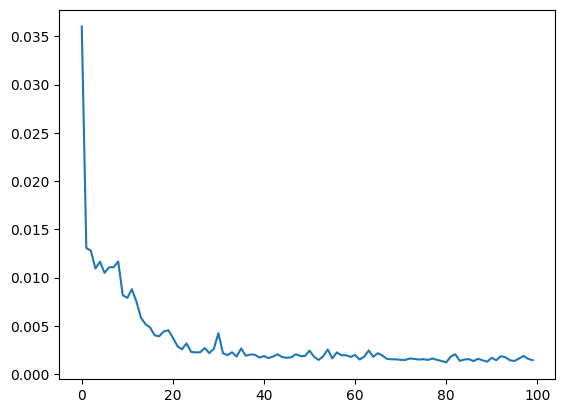

In [40]:
plt.plot(range(len(loss_per_epochs)),loss_per_epochs)

In [41]:
last_train_batch = scaled_train[-12:]
last_train_batch = last_train_batch.reshape((1,n_input,n_feature))
model.predict(last_train_batch)

1/1 [==============================] - 0s 223ms/step


array([[0.61355066]], dtype=float32)

In [42]:
scaled_test[0]

array([0.63840399])

In [43]:
test_predictions = []
first_eval_batch = scaled_train[-12:]
current_batch = first_eval_batch.reshape(1,n_input,n_feature)

for i in range(len(test)):

  #get the predition value for the first batch
  current_pred = model.predict(current_batch)[0]

  #append the prediction into an array
  test_predictions.append(current_pred)

  #Use the prediction to update the batch and remove the first value
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis = 1)

1/1 [==============================] - 0s 23ms/step


In [44]:
test_predictions

[array([0.61355066], dtype=float32),
 array([0.6163766], dtype=float32),
 array([0.6539509], dtype=float32),
 array([0.6700485], dtype=float32),
 array([0.751076], dtype=float32),
 array([0.89060897], dtype=float32),
 array([1.0135462], dtype=float32),
 array([0.99257183], dtype=float32),
 array([0.8118973], dtype=float32),
 array([0.64559597], dtype=float32),
 array([0.5601984], dtype=float32),
 array([0.5879929], dtype=float32),
 array([0.6272818], dtype=float32),
 array([0.65008354], dtype=float32),
 array([0.67530465], dtype=float32),
 array([0.71590763], dtype=float32),
 array([0.8101226], dtype=float32),
 array([0.94140565], dtype=float32),
 array([1.0328237], dtype=float32),
 array([0.99967945], dtype=float32),
 array([0.8298302], dtype=float32),
 array([0.6574889], dtype=float32),
 array([0.5793108], dtype=float32),
 array([0.5947535], dtype=float32)]

In [45]:
test.head()

,Passengers
Month,
1959-01-01,360
1959-02-01,342
1959-03-01,406
1959-04-01,396
1959-05-01,420


In [46]:
true_predictions = scaler.inverse_transform(test_predictions)

In [47]:
true_predictions

array([[350.03381586],
       [351.1670081 ],
       [366.23432279],
       [372.68943858],
       [405.1814692 ],
       [461.13419551],
       [510.43203759],
       [502.02130413],
       [429.57080841],
       [362.88398308],
       [328.63956892],
       [339.78515553],
       [355.53999579],
       [364.68350029],
       [374.79716516],
       [391.07896096],
       [428.85916626],
       [481.50366724],
       [518.16229641],
       [504.87145793],
       [436.76192194],
       [367.6530419 ],
       [336.3036207 ],
       [342.49615502]])

In [48]:
test["Prediction"] = true_predictions

<ipython-input-48-0c5138a205ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Prediction"] = true_predictions


In [49]:
test.head()

,Passengers,Prediction
Month,,
1959-01-01,360,350.033816
1959-02-01,342,351.167008
1959-03-01,406,366.234323
1959-04-01,396,372.689439
1959-05-01,420,405.181469


<Axes: xlabel='Month'>

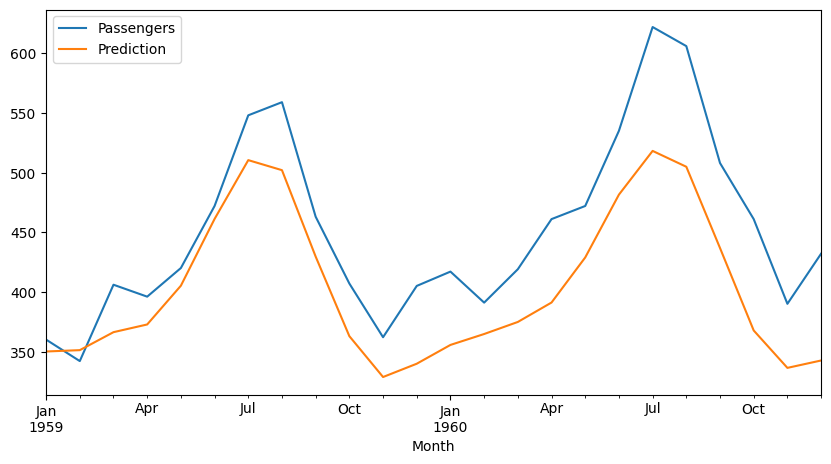

In [50]:
test.plot(figsize = (10,5))

In [51]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [52]:
rmse = sqrt(mean_squared_error(test["Passengers"],test["Prediction"]))

In [53]:
print(rmse)

56.81145229289536


In [54]:
#del model
#Defining the model2
model2 = Sequential()
model2.add(LSTM(100,activation = "relu",input_shape = (n_input,n_feature)))
model2.add(Dense(1))
model2.compile(optimizer="sgd",loss = "mse")

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [56]:
#fitting the mode
model2.fit(generator,epochs = 50)

Epoch 1/50
108/108 [==============================] - 2s 8ms/step - loss: 0.0575
Epoch 2/50
108/108 [==============================] - 1s 10ms/step - loss: 0.0280
Epoch 3/50
108/108 [==============================] - 1s 9ms/step - loss: 0.0248
Epoch 4/50
108/108 [==============================] - 1s 7ms/step - loss: 0.0218
Epoch 5/50
108/108 [==============================] - 1s 7ms/step - loss: 0.0189
Epoch 6/50
108/108 [==============================] - 1s 7ms/step - loss: 0.0167
Epoch 7/50
108/108 [==============================] - 1s 7ms/step - loss: 0.0148
Epoch 8/50
108/108 [==============================] - 1s 7ms/step - loss: 0.0136
Epoch 9/50
108/108 [==============================] - 1s 7ms/step - loss: 0.0125
Epoch 10/50
108/108 [==============================] - 1s 7ms/step - loss: 0.0119
Epoch 11/50
108/108 [==============================] - 1s 7ms/step - loss: 0.0113
Epoch 12/50
108/108 [==============================] - 1s 7ms/step - loss: 0.0108
Epoch 13/50
108/108 [===

In [57]:
loss_per_epochs = model2.history.history["loss"]

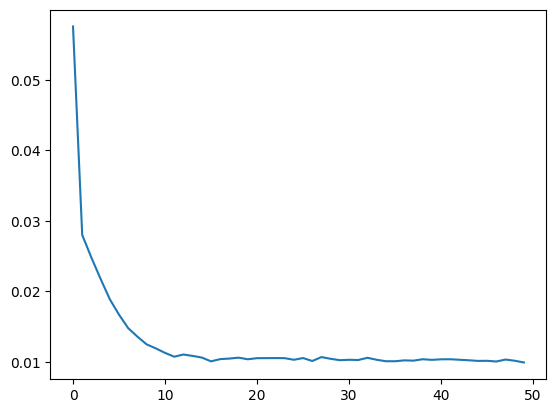

In [58]:
plt.plot(range(len(loss_per_epochs)),loss_per_epochs)

In [59]:
test_predictions1 = []
first_eval_batch = scaled_train[-12:]
current_batch1 = first_eval_batch.reshape(1,n_input,n_feature)

for i in range(len(test)):

  #get the predition value for the first batch
  current_pred1 = model2.predict(current_batch1)[0]

  #append the prediction into an array
  test_predictions1.append(current_pred1)

  #Use the prediction to update the batch and remove the first value
  current_batch1 = np.append(current_batch1[:,1:,:],[[current_pred1]],axis = 1)

1/1 [==============================] - 0s 26ms/step


In [60]:
true_predictions1 = scaler.inverse_transform(test_predictions1)

In [61]:
test["Prediction1"] = true_predictions1

<ipython-input-61-661e03b8d00a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Prediction1"] = true_predictions1


In [63]:
test.head()

,Passengers,Prediction,Prediction1
Month,,,
1959-01-01,360,350.033816,384.510481
1959-02-01,342,351.167008,388.014053
1959-03-01,406,366.234323,391.392429
1959-04-01,396,372.689439,393.988797
1959-05-01,420,405.181469,396.735792


<Axes: xlabel='Month'>

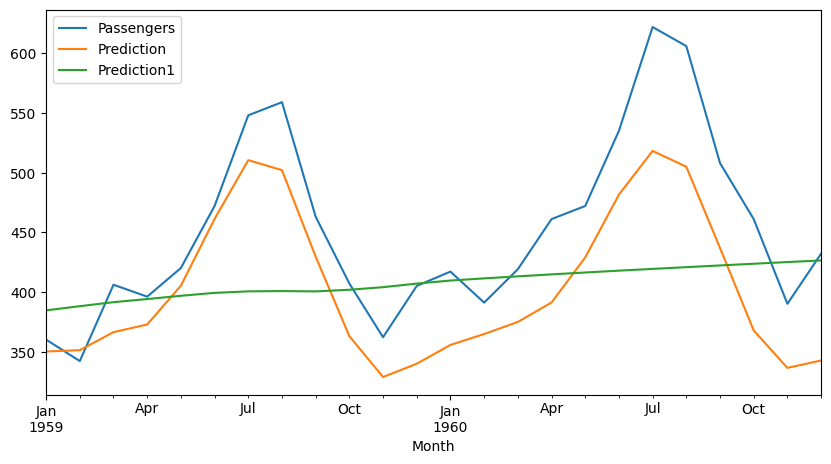

In [64]:
test.plot(figsize = (10,5))

In [ ]:
# here we can clearly see that Model1 is performing way better than model2 it might be the case that Adam optimizer is better than SGD optimizer
# in the above graph we can clearly see that prediciton which is of model1 is matching our passengers line better prediction1 which is of model2